## Get the Data

In [1]:
import pandas_datareader as pdr
# from pandas_datareader import data, wb
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data

In the dataset, we will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo



In [3]:
df = pd.read_pickle('all_banks')

In [4]:
df.head()

Bank Ticker    BAC                                     C                        
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9  \
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC          
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98  \
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [5]:
tickers = df.columns.get_level_values(0).unique()
tickers

Index(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], dtype='object', name='Bank Ticker')

In [6]:
BAC=df['BAC']

In [7]:
BAC.head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15620000


** Check the head of the bank_stocks dataframe.**

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [8]:
#using df.columns.get_level_values(0).unique() for getting first level column names
for col in tickers:
    print(col, df[col]['Close'].max())

BAC 54.9
C 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


In [9]:
#The above task can be done like this
df.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [10]:
returns=pd.DataFrame()    

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [11]:
for col in tickers:
    returns[col+'Return']=df[col]['Close'].pct_change()

In [12]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


**Let's Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

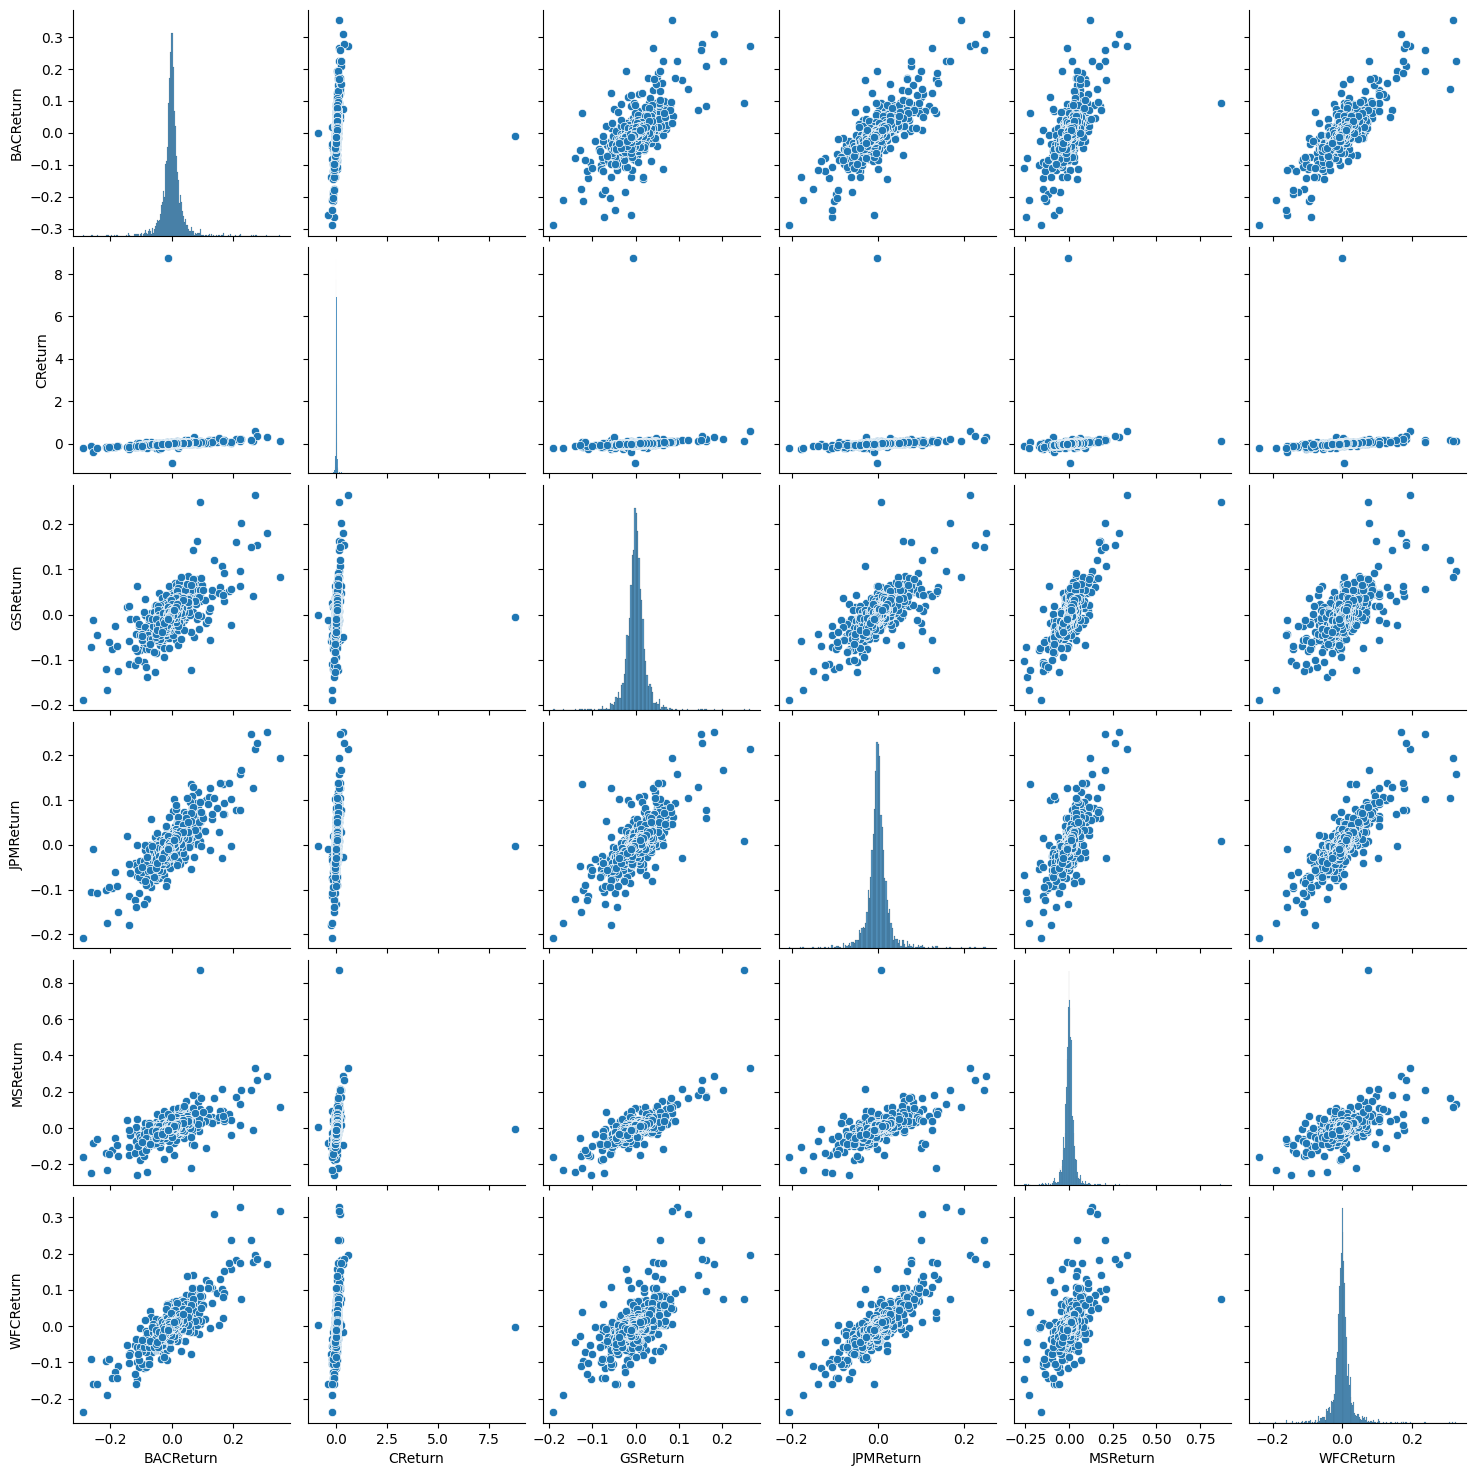

In [13]:
sns.pairplot(returns[1:])

Citigroup's stock has suddenly fallen and no data exists after 2008. It's because their stocks crashed in Nov 17th.

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

We'll also see the enormous crash in value by looking at the stock price plot (which we do later in the visualizations.)

** Using this returns DataFrame,Let's see on what dates each bank stock had the best and worst single day returns. We should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [14]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2011-05-06
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

We can see that WFC,JPM,GS,BAC have their min returns on 20 jan 2009. The only significant event that can be observed was Barack obama's inauguration happened that day. May be the investors kind of withdrew with a worry of upcoming policies.

In [15]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2011-05-09
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another. 

The reason is in 2011, Citigroup Inc. announced a 1-for-10 reverse stock split of Citigroup common stock which has been implemented from may 6 2011 and this has resulted in increase in its stock market returns(possible reasons might be 1) A higher stock price can attract more attention from both individual and institutional investors, potentially increasing demand for the stock, 2)A reverse stock split can create the perception that the company is taking action to address its low stock price,making investors interpret it as company is confident in its future prospects,3): Low-priced stocks tend to experience higher price volatility and attract more speculative trading. A higher stock price resulting from a reverse split can reduce this volatility and attract more long-term investors).  **

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period. Standard deviation sometimes can be used to perceive the risk in the stock value of that company indicating that high s.d means more fluctuation of the stock and thus more risky. Which would you classify as the riskiest for the year 2015?**

In [16]:
returns.std()

BACReturn    0.036650
CReturn      0.179969
GSReturn     0.025346
JPMReturn    0.027656
MSReturn     0.037820
WFCReturn    0.030233
dtype: float64

**We can see overall s.d value is a lot more for citibank than other banks because of the crash. Let's check for some period which is far from the crash year 2008**

In [17]:
returns.loc['2015-01-01':'2015-12-30','BACReturn':'WFCReturn'].std()

BACReturn    0.016175
CReturn      0.015306
GSReturn     0.014061
JPMReturn    0.014034
MSReturn     0.016263
WFCReturn    0.012602
dtype: float64

**Now, we can observe that the standard deviation values are similar for all banks**

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

<Axes: xlabel='MSReturn', ylabel='Density'>

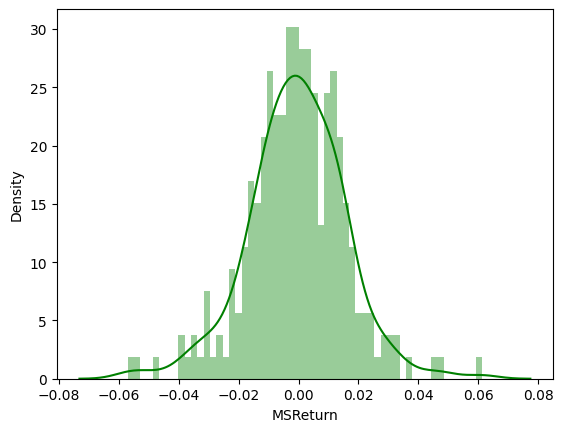

In [18]:
sns.distplot(returns.loc['2015-01-01':'2015-12-30','MSReturn'],color='green',bins=56)

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

<Axes: xlabel='CReturn', ylabel='Density'>

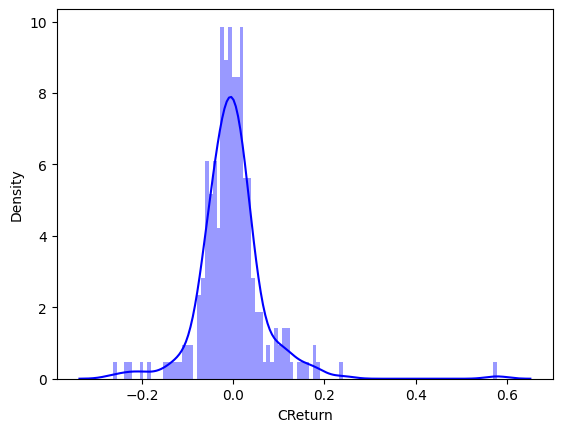

In [19]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'],color='blue',bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Use visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

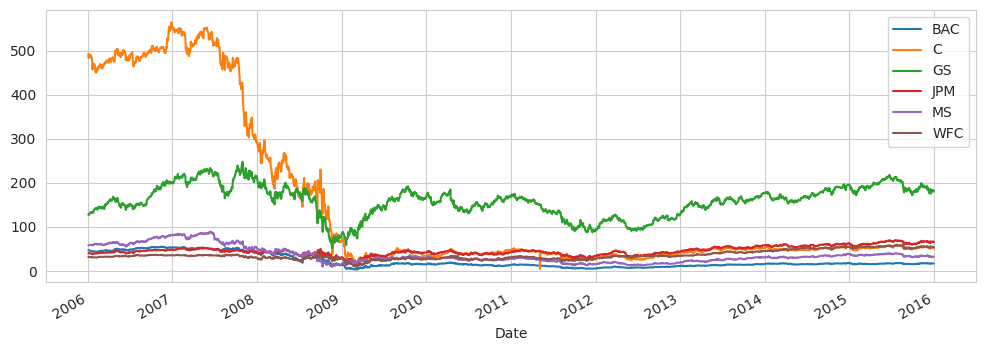

In [21]:
for tick in tickers:
    df[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [22]:
df.xs(key='Close',axis=1,level='Stock Info').iplot()#plotly gives a nice plot where we can see the vlues by moving our pointer on the top of curves 

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

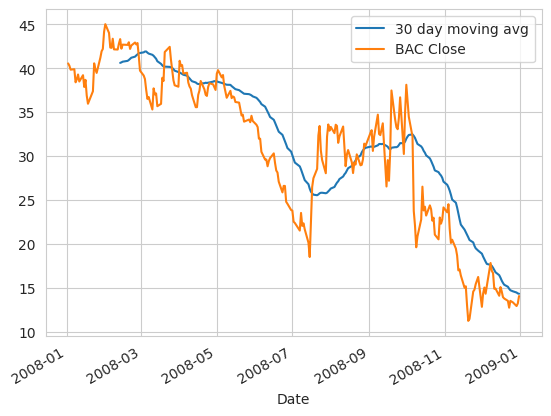

In [23]:
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label="30 day moving avg")
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

**Create a heatmap of the correlation between the stocks Close Price. More dark coloured means less correlated and vice-versa**

In [24]:
stocks_close_price=pd.DataFrame()
for col in tickers:
    stocks_close_price[col]=df[col]['Close']
stocks_close_price.head()


,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68


<Axes: >

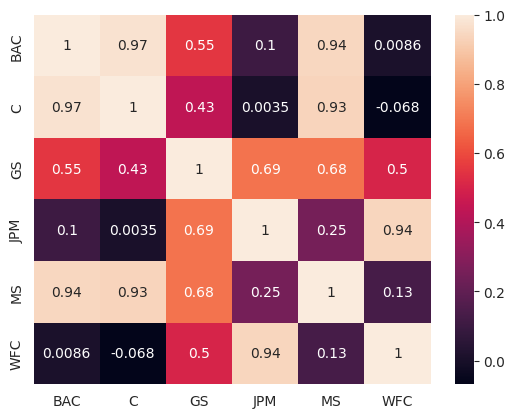

In [25]:
sns.heatmap(stocks_close_price.corr(),annot=True)

**Let's use seaborn's clustermap to cluster the correlations together:**

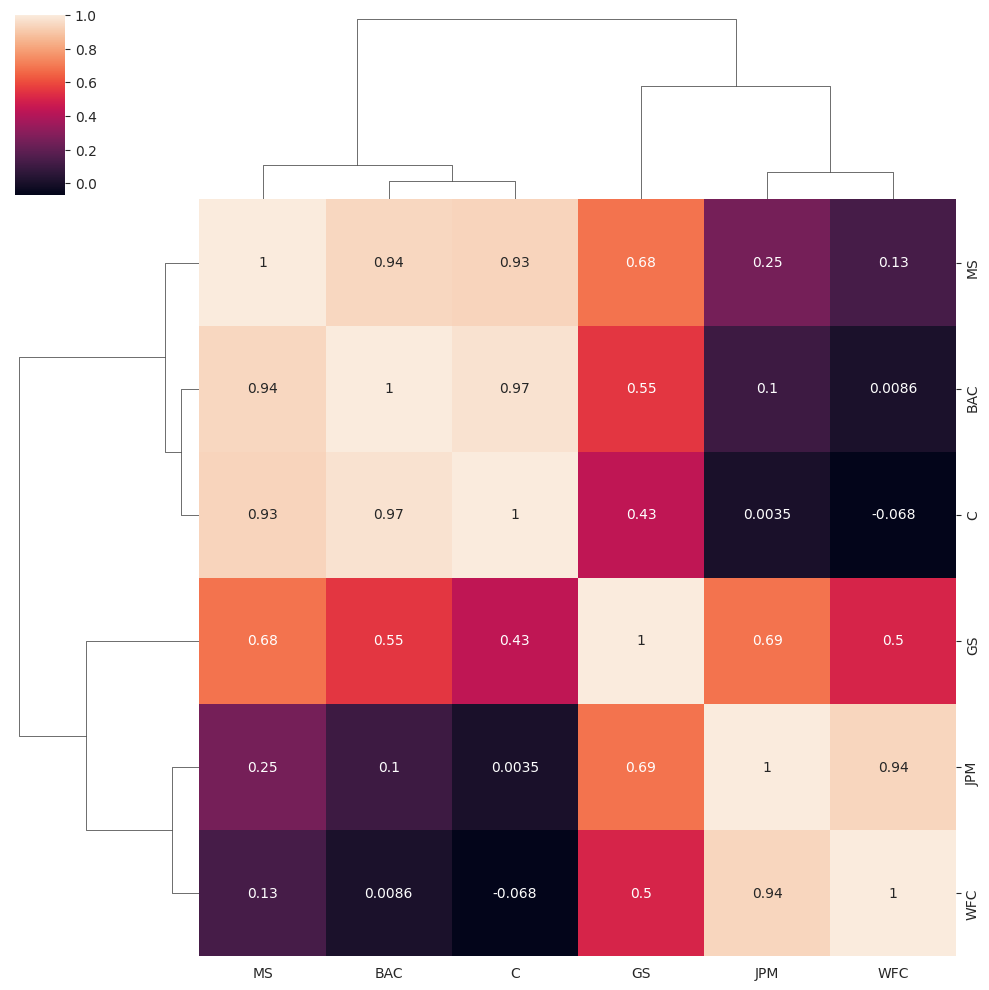

In [26]:
sns.clustermap(stocks_close_price.corr(),annot=True)

**We can see that JPM&WFC and MS&BAC are correlated to each other**

In [27]:
close_corr = df.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')



**Let's use the cufflinks library to create some Technical Analysis plots.**

**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016. This will tell Open&Close values and High&Low values in a given day**

In [28]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

**Use .ta_plot(study='sma') of cufflinks library to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [29]:
MS=df['MS']
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [30]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')